In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
# sns.set_context('paper', font_scale=0.73)
sns.set_context('paper', font_scale=1.3)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

In [2]:
!echo $CONDA_DEFAULT_ENV

pytorch1.9


In [11]:
#paths
root_dir = "/home/ryan/haveibeentrainedon/models/unstealthy_scaling"
dataset_name = "pile1e9_10len"
model_sizes = ["70M", "160M"]
scored_file = "scored.csv"

experiments = [f"{root_dir}/{dataset_name}/{model_size}" for model_size in model_sizes]
experiments

['/home/ryan/haveibeentrainedon/models/unstealthy_scaling/pile1e9_10len/70M',
 '/home/ryan/haveibeentrainedon/models/unstealthy_scaling/pile1e9_10len/160M']

In [12]:
models = list(filter(lambda x: x[-5:] == "model", os.listdir(experiments[0])))
models = sorted(models, key = lambda x: eval(x[:-6]))
models

['1_model',
 '2_model',
 '4_model',
 '8_model',
 '16_model',
 '32_model',
 '64_model',
 '128_model',
 '256_model']

In [13]:
experiments_dfs = []
for experiment in experiments:
    model_dfs = []
    for model_type in models:
        model_dfs += [pd.read_csv(os.path.join(experiment,  model_type, scored_file), header=None)]
    experiments_dfs.append(model_dfs)
print(len(experiments_dfs))
print(len(model_dfs))

2
9


In [14]:
x_axis = [1, 2, 4, 8, 16, 32, 64, 128, 256]
y_axises = []
for experiment_dfs in experiments_dfs:
    y_axis = []
    for model_df in experiment_dfs:
        null = model_df[0][1:]
        mean = np.log(null).mean()
        stdev = np.log(null).std()
        
        statistic = np.log(model_df[0][0])
#         print(f"statistic = {statistic}, mean = {mean}, stdev = {stdev}")

        
        y_axis += [(statistic - mean) / stdev]
    y_axises.append(y_axis)
print(len(y_axises))

2


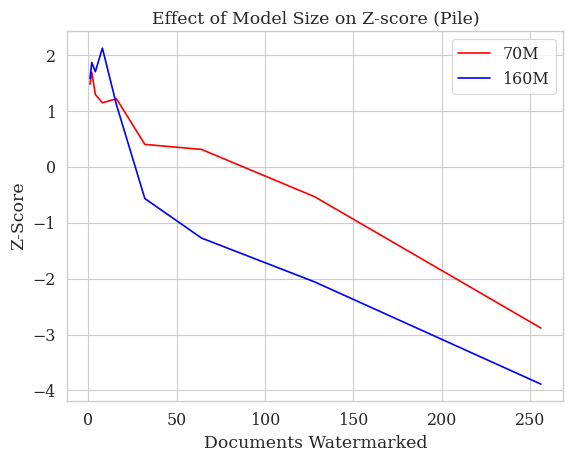

In [16]:
# Create a line plot for each set of y-values
sns.lineplot(x=x_axis, y=y_axises[0], color='red', label='70M')
sns.lineplot(x=x_axis, y=y_axises[1], color='blue', label='160M')
# sns.scatterplot(x=x_axis, y=y_axises[2], color='green', label='30char')

# Customize the plot
plt.title('Effect of Model Size on Z-score (Pile)')
plt.xlabel('Documents Watermarked')
plt.ylabel('Z-Score')
plt.legend()

# Show the plot
plt.show()